# Load the Dataframe

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [5]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Show certain rows

In [6]:
df[10:15]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0


# Show certain columns

In [7]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [14]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [18]:
df[['   TG','    DATE']][59315:59320]

,TG,DATE
59315,-9999,2022-05-26
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


# Simple Statistics and filtering

In [17]:
df['   TG'].mean()

-991.1500649011311

In [19]:
df.loc[df['   TG'] != -9999]

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0
53656,1,35381,2006-11-27,70,0
53657,1,35381,2006-11-28,71,0
53658,1,35381,2006-11-29,63,0


In [23]:
df.loc[df['   TG'] != -9999]['   TG'] #filter the df to exclude any rows with tf=-9999 and then get the tf of all the reminaing rows

0        21
1        46
2        31
3        37
4        31
         ..
53655    80
53656    70
53657    71
53658    63
53659    84
Name:    TG, Length: 53103, dtype: int64

In [25]:
df.loc[df['   TG'] != -9999]['   TG'].max() / 10

26.2

In [26]:
df.loc[df['   TG'] != -9999]['   TG'].min() / 10 

-28.8

In [27]:
df.loc[df['   TG'] != -9999]['   TG'].mean() / 10 

6.360787526128467

<Axes: >

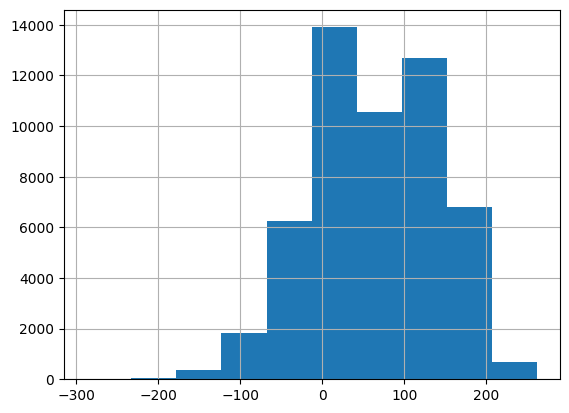

In [29]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

# Get certain cells

In [31]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [35]:
df.loc[df['    DATE']=="1860-01-03"]['   TG'].squeeze() / 10

3.1

In [42]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [43]:
df.loc[3, '   TG']

37

# Calculate a new column out of an existing column

In [6]:
import numpy as np
df["TG"] = df['   TG'].mask(df['   TG']==-9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG
0,1,35381,1860-01-01,21,0,21.0
1,1,35381,1860-01-02,46,0,46.0
2,1,35381,1860-01-03,31,0,31.0
3,1,35381,1860-01-04,37,0,37.0
4,1,35381,1860-01-05,31,0,31.0
...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN
59317,1,35381,2022-05-28,-9999,9,NaN
59318,1,35381,2022-05-29,-9999,9,NaN
59319,1,35381,2022-05-30,-9999,9,NaN


In [7]:
df["Temp_C"] = df['TG'] / 10

In [8]:
df["Temp_F"] = df["Temp_C"] * (9/5) + 32
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Temp_C,Temp_F
0,1,35381,1860-01-01,21,0,21.0,2.1,35.78
1,1,35381,1860-01-02,46,0,46.0,4.6,40.28
2,1,35381,1860-01-03,31,0,31.0,3.1,37.58
3,1,35381,1860-01-04,37,0,37.0,3.7,38.66
4,1,35381,1860-01-05,31,0,31.0,3.1,37.58
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


# Plotting

<Axes: >

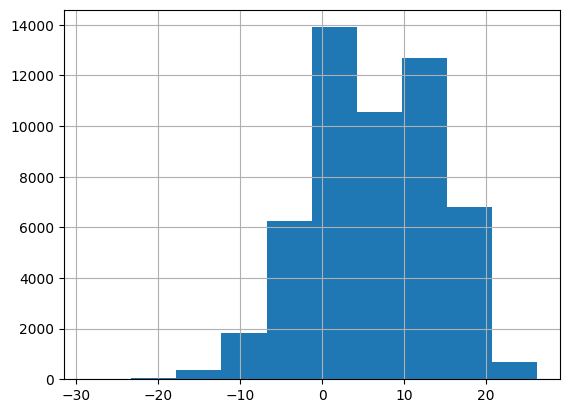

In [62]:
df["Temp_C"].hist()

<Axes: xlabel='    DATE'>

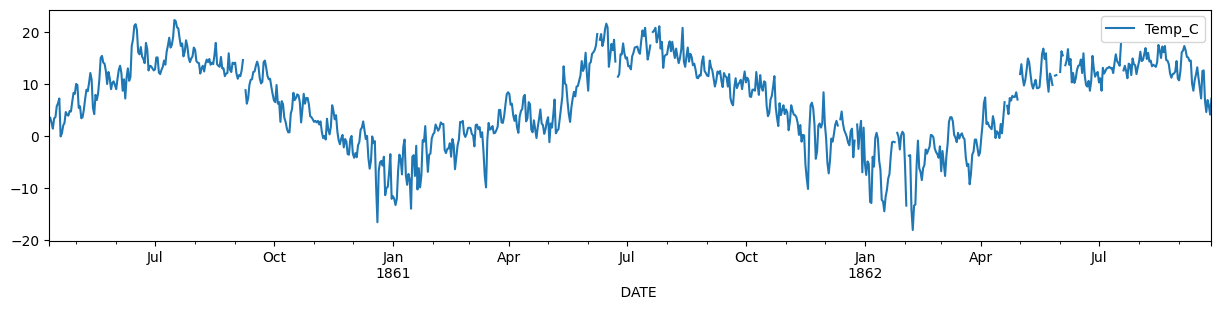

In [70]:
df[100:1000].plot(x='    DATE',y='Temp_C', figsize=(15, 3))